<a href="https://colab.research.google.com/github/dhtdmwns1201/deeplearing/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이토치

In [ ]:
import torch
import numpy as np


In [ ]:
t = np.array([[[0,1,2,],
                [4,5,6,]],
                       
            [[7.,8.,9.],
             [10.,11.,12.]]])

ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
torch.Size([4, 3])


In [ ]:
#3차원 공간으로 표현할 때는 (x,y,z) x = 행렬 개수 y = 행수 z = 열수
#2차원일 때 세로는 dim = 0 가로는 dim = 1
print(ft.view([-1,1,3]))
print(ft.view([-1,1,3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 4.,  5.,  6.]],

        [[ 7.,  8.,  9.]],

        [[10., 11., 12.]]])
torch.Size([4, 1, 3])


In [ ]:
 x = torch.FloatTensor([[1,2],[3,4]])

In [ ]:
ft = torch.FloatTensor([[0],[1],[2]])
print(ft) 
print(ft.size()) 

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
#squeeze 를 이용하면 1dim 인 것에 대하여 그것을 지워 준다
#최초(3,1) 행렬 이였는데 뒤에 1을 지워서 사이즈는 3 행렬 적인 개념으로 접근하면 (1,3)행렬을 만든다


print(ft.squeeze(dim = 1))

print(ft.squeeze().size())

tensor([0., 1., 2.])
torch.Size([3])


In [ ]:
x = torch.FloatTensor([[1,2],[3,4]])
y = torch.FloatTensor([[5,6],[7,8]])
print(torch.cat([x,y],dim = 0))
print(torch.cat([x,y],dim = 1))
print(torch.cat([x,y],dim = 0).size())
print(torch.cat([x,y],dim = 1).size())

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])
torch.Size([4, 2])
torch.Size([2, 4])


In [ ]:
x = torch.FloatTensor([[1,2],[3,4]])
print(x.mul(2))#메모리에 선언하지 않음 
print(x)
print(x.mul_(2))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


In [ ]:
#공부한 시간과 점수의 상관 관계
#선형회귀 , 평균 제곱 오차, 경사 하강법
#W 와 b 를 0으로 초기화 -> 항상 0출력
#MSE 

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])
W = torch.zeros(1,requires_grad = True)
#b = torch.zeros(1,requires_grad = True)
hypothesis = x_train * W + b #예측값이 될것이다. 
cost = torch.mean((hypothesis - y_train)**2) #모델이 실제 데이터와 얼마나 다를까. -> cost를 최소화 하여야한다.
optimizer = optim.SGD([W,b],lr = 0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [ ]:
#데이터값
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])
#모델의 초기화 
W = torch.zeros(1,requires_grad = True)
#learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    #H(x) 계산
    hypothesis = x_train * W
    #cost gradient 계산
    cost = torch.mean((hypothesis - y_train)**2)
    gradient = torch.sum((W*x_train - y_train)*x_train)
    

In [ ]:
#optimizer설정 
optimzer = optim.SGD([w],lr = 0.15)
#cost로 H(x) 개선
optimizer.zero_grad() #기울기값 0으로 초기화 
cost.backward() # 코스트 변수에서 기울기 값 계산
optimizer.step() # 기울기 값 하강 gredient값을 이용하여 cost값을 줄인다. 

In [ ]:
#H(x) = Wx + b
#x라는 vector 와 W라는 matrix 의 곱 b는 bias


In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])
W = torch.zeros(1) #프린트 시 [0,] 로 출력
lr = 0.1 #학습 rate
nb_epochs = 10 #총 학습 횟수
for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train)*x_train)
    print('Epch {:4d}/{} W :{:.3f} , Cost : {:.6f}'.format(epoch, nb_epochs,W.item(),cost.item()))
    print(W)
    W -= lr * gradient

Epch    0/10 W :0.000 , Cost : 4.666667
tensor([0.])
Epch    1/10 W :1.400 , Cost : 0.746666
tensor([1.4000])
Epch    2/10 W :0.840 , Cost : 0.119467
tensor([0.8400])
Epch    3/10 W :1.064 , Cost : 0.019115
tensor([1.0640])
Epch    4/10 W :0.974 , Cost : 0.003058
tensor([0.9744])
Epch    5/10 W :1.010 , Cost : 0.000489
tensor([1.0102])
Epch    6/10 W :0.996 , Cost : 0.000078
tensor([0.9959])
Epch    7/10 W :1.002 , Cost : 0.000013
tensor([1.0016])
Epch    8/10 W :0.999 , Cost : 0.000002
tensor([0.9993])
Epch    9/10 W :1.000 , Cost : 0.000000
tensor([1.0003])
Epch   10/10 W :1.000 , Cost : 0.000000
tensor([0.9999])


tensor([0.])


In [ ]:
#너무 많은 데이터를 다룰 때는 minibatch gradient descent를 사용한다.
from torch.utils.data import Dataset 

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73,80,75],
                       [93,88,93],
                       [89,91,90],
                       [96,98,100],
                       [73,66,70]]
        self.y_data = [[152],[185],[180],[196],[142]]
    def __len__(self):
        return len(self.x_data) 
    def __getitem__(self,idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
dataset = CustomDataset()

from torch.untils.data import DataLoader 

dataloader = DataLoader(
    dataset,batch_size = 2, suffle = True,
)

nb_epochs = 20 #총 학습 횟수
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train , y_train = samples
        prediction = moedel(x_train)

        cost

    hypothesis = x_train * W
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train)*x_train)
    print('Epch {:4d}/{} W :{:.3f} , Cost : {:.6f}'.format(epoch, nb_epochs,W.item(),cost.item()))
    print(W)
    W -= lr * gradient 

In [ ]:
#Logistic Regression
#가설 새로 : 개수 가로 : dimension

import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
torch.manual_seed(1)

x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
W = torch.zeros((2,1),requires_grad = True) 
b = torch.zeros(1,requires_grad = True)
hypothesis = torch.sigmoid(x_train.matmul(W)+b)


In [ ]:
#이산적인 확률분포
#softmax
#ex) 가위바위보 예측?
#P(주먹|가위) = ?? 확률분포를 정의할 수 있음
#P(가위|가위) = ??
#P(보|가위) = ??
#이러한 확률분포를 근사시킨다. 
#max를 뽑는다면 가장 큰 것을 반환 
#softmax를 활용한다면 비율에 따라 1이 되는 값을 나타내 준다. 
z = torch.FloatTensor([1,2,3])
hypoehsis = F.softmax(z,dim = 0)
print(hypoehsis) #합은 1이 된다. 

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
#Cross Entropy를 최소화하는 것이 중요 
#두개의 확률분포가 얼마나 비슷한지
z = 

In [ ]:
#7강 모르는 건 찾아보기 시즌 1 찾아보기
# 1 maximum likelihood estimation(최대가능도 추정)
# 2 optimization via gradient descent 
# 3 overfitting and refrularization (과적합과 정규화)
# 4 training and test dataset 
# 5 learnin rate (학습률)
# 6 data preprocessin (데이터 전처리)
# 1.MLE 왜하는지 : 확률에 대한 예측 n = 100 class1의 확률 = 27 이라고 가정(베르누이 실험)
# 관찰값을 가장 잘 설명하는 확률분포 함수의 파라미터를 찾아내는 과정을 거친다.
# 기울기를 구하여 접근 
# 3. overfitting ex) o와x를 가르는 선을 찾고 싶다. 주어진 데이터에 대해 과도하게 맞춰서 선이 그어지는 것
# overfitting을 최소화하는 것이 중요하다. test set을 이용하여 판단한다.
# overfitting을 막는 방법 More data Less feautre regulariztion
# regularization DNN(데이터 신경망)

In [ ]:
x_train = torch.FloatTensor([[1,2,1], #size(m,3)
                             [1,3,2], 
                             [1,3,4],
                             [1,5,5],
                             [1,7,5],
                             [1,2,5],
                             [1,6,6],
                             [1,7,7]
                             ])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0]) #

x_test = torch.FloatTensor([[2,1,1],[3,1,2],[3,3,4]])
y_test = torch.LongTensor([2,2,2])

In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super(). __init__()
        self.linear = nn.Linear(3,3) #3개 벡터를 3개로 리턴해주는 함수
    def forward(self,x):
        return self.linear(x)
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(),lr = 0.1)

In [ ]:
def train(model,optimizer,x_train,y_train):
    nb_epochs = 20 
    for epoch in range(nb_epochs):
        prediction = model(x_train)
        cost = F.cross_entropy(prediction, y_train) #예측값과 y값이 얼마나 같은지
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print(epoch,cost.item())

In [ ]:
#learning rate 가 발산하면 작게 cost가 줄어들지 않으면 크게 조정한다

In [ ]:
#데이터 전 처리 (정규 분포로 만들어 준다)

In [ ]:
#autograd back progation 을 이용해 파라미터를 업데이트 하는 방법은 autograd방식으로 쉽게 구현할 수 있다. 파라미터 업데이트 방법
import torch

if torch.cuda.is_avialable():
    DEViCE =torch.device

파이썬 스터디 

In [ ]:
import torch
import torch.autograd #자동 미분함수 포함, 콘텍스트 메니저 
import torch.nn  #신경망 구축을 위한 데이터 구조
import torch.optim #SGD를 중심으로 한 파라미터 최적화 알고리즘
import torch.utils.data #SGD 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수 
import torch.onnx #많이 사용하지는 않음 딥러닝간에 공유를 위한 포멧

#Tensor의 개념 이해하기

In [ ]:
a = 2 #스칼라
b = [2,4] #벡터
c = [[1,2],
     [3,5]]
d = [[[1,2],[2,4]],[[3,4],[5,6]],[[7,8],[9,10]]]

In [ ]:
2D Tensor 
|t| = (Batch size, dim)
#아래의 그림과 같이 행렬에서 행의 크기가 batch size(row), 열의 크기가 dim(column)이라는 의미입니다.

from sklearn.datasets import load_iris 
iris = load_iris()
print (iris.data.shape)#row =150 col = 5(target 포함) 
iris['data'][:10]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_namesㅡ

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

(1797, 8, 8)


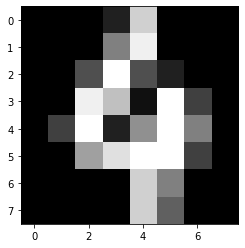

In [ ]:
#3D Tensor 의 예시

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


mnist = load_digits()
print(mnist['images'].shape)
plt.imshow(mnist['images'][100],cmap='gray')
plt.show()

In [ ]:
import numpy as np
t1 = np.array([0,1,2,3,4,5,6])
print(t1.shape)
(7,) - > (1,7) 이라는 뜻

(7,)


In [ ]:
#2차원 데이터(흑백 사진이 대표적)
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t) #넘파이는 딥러닝 할 때 잘 안쓴다

In [ ]:
#pytorch 이용, gpu를 이용할 수 있게 한다. 
import torch
t = torch.tensor([[1., 2., 3.],
                  [4., 5., 6.],
                  [7., 8., 9.],
                  [10.,11.,12.]])
print(t.dim())
print(t.shape)
print(t.size())

2
torch.Size([4, 3])
torch.Size([4, 3])


In [ ]:
print(t[:,1])
print(t[:,1].size())

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [ ]:
print(t[:,:-1]) #맨마지막 꺼는 제거 하고 가져오기

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


In [ ]:
m1 = torch.tensor([[3., 3.]])
m2 = torch.tensor([[2., 2.]])
print(m1 + m2)

tensor([[5., 5.]])


In [ ]:
#broad casting
m1 = torch.tensor([[3,2]])
m2 = torch.tensor([3])
print(m1.dim())
print(m1 + m2)

1
tensor([6, 5])


In [ ]:
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)
print(m2.dim())
print(m1.dim())


tensor([[4., 5.],
        [5., 6.]])
2
1


In [ ]:
#floattensor란 텐서를 실수형으로 선언하는 것
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) 
print('Shape of Matrix 2: ', m2.shape) 
print(m1.matmul(m2)) #행렬곱

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [ ]:
#토치에 내장 되어 있는 기능도 있음
torch.matmul(m1,m2)

tensor([[ 5.],
        [11.]])

In [ ]:
#점곱
print(m1.mul(m2))


tensor([[1., 2.],
        [6., 8.]])


In [ ]:
#평균
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.mean(dim = 0))

tensor([2., 3.])


In [ ]:
print(t.mean(dim = 1))

tensor([1.5000, 3.5000])


In [ ]:
print(t.max())

tensor(4.)


In [ ]:
print(t.max(dim = 1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


In [ ]:
print(t.sum(dim = 0))

tensor([4., 6.])


In [ ]:
print(t.sum(dim = 1))

tensor([3., 7.])


In [ ]:
#view 조작 하기 tensor의 크기를 변경해주는 역할 
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [ ]:
print(ft.size())

torch.Size([2, 2, 3])


In [ ]:
print(ft.view([-1,3])) # 행수는 모르겠는데 열 수는 3개로 바꿔줘
print(ft.view([-1,3]).size())


tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
print(ft.view([2,6]))
#컬럼이나 행을 결정하는 요소는 2x2x3 = 12 의 약수인 1,2,6,3,4,12 만 가능하다

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])


In [ ]:
#squeeze 조작하기 1인차원을 제거한다
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())
print(ft.squeeze().size()) #차원을 줄여준다

tensor([0., 1., 2.])
torch.Size([3])


In [ ]:
#unsqueeze 조작 하기 특정위치에 1인차원을 추가 한다. 
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [ ]:
print(ft.unsqueeze(0))

tensor([[0., 1., 2.]])


In [ ]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
#타입 캐스팅 중요!!!!
#타임끼리만 연산 가능

In [ ]:
#long tensor : 정수형 의미
#

In [ ]:
#True를 1로 
bt = torch.ByteTensor([True, False, False, True])
print(bt) 

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [ ]:
#concatenate
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])
print(torch.cat([x,y],dim = 0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [ ]:
print(torch.cat([x,y],dim = 1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [ ]:
#stacking 한번에 많은 것을 concatenate할 수 있다. 
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(torch.stack([x,y,z],dim  = 1)) #열이 증가 하는 거니까 x,y,z 가 각각 열 행렬로 변경

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)
print(torch.ones_like(x)) #같은 size를 1로 체우기 
print(torch.zeros_like(x)) #같은 size를 0로 체우기

tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
#덮어쓰기 조작하기
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2))
print(x)
print(x.mul_(2))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


In [ ]:
#perceptron 인공 신경망 뉴런의 동작 방식을 본따 만든 것을 의미 
#뉴런의 동작 방식은 입력 신호의 총 크기가 시놉시스를 전파하는 긴다면 다음으로 
#and와 or 의 문제를 해결하기 위하여 만들어짐
#xor 게이트는 같은 입력이 들어오면 0, 다른 입력이 들어오면 1

In [ ]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
#and or 연산의 이해 이런 식으로 w1 w2 b 를 찾는 과정을 
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
AND_gate(1,1),AND_gate(1,0),AND_gate(0,0) 

(1, 0, 0)

In [ ]:
#단층 perceptron 구현 xor 연산 기반
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr= 1)
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())    

#accuracy(정확도) = 0.5 밖에 안된다.                         

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [ ]:
#Backpropagation
#1. forward ->
#2. backward -> 미분 값 계산 


In [ ]:
#multylayer perceptron
#여러 층을 쌓으면서 두줄로 나누는 것

#Backpropagation
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)
w1 = torch.Tensor(2,2).to(device)
w1 = torch.Tensor(2).to(device)
w1 = torch.Tensor(2,1).to(device)
w1 = torch.Tensor(1).to(device)

def sigmoid(x):
    return 1.0 / (1.0 + torch.exp(-x))

def simoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))
for step in range(10001): 
    l1 = torch.add(torch.matmu(X,w1),b1)
    a1 = sigmoid(l1)
    l2 = torch.add(torch.matmu(a1,w2),b2)
    Y_pred = sigmoid(l2)

    #바이너리 크로스 엔트로피
    cost  = -torch.mean(Y*torch.log(Y_pred)+(1 - Y) * torch.log(1 - Y_pred))

In [ ]:
#code : xor-nn 
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)
#nn Layer
linear1 = nn.Linear(2,2,bias = True)
linear2 = nn.Linear(2,1,bias = True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear1,sigmoid,linear2,sigmoid).to(device)
crierion = nn.BCELoss().to(device) #크로스 엔트로피 함수
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis,Y)
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(step,cost.item())

0 0.8614466190338135
100 0.6930065751075745
200 0.6925849318504333
300 0.68949294090271
400 0.6601967811584473
500 0.5637606978416443
600 0.4720391631126404
700 0.3573341965675354
800 0.11411609500646591
900 0.05688456445932388
1000 0.036910295486450195
1100 0.027103299275040627
1200 0.021335892379283905
1300 0.017556410282850266
1400 0.01489521935582161
1500 0.012923291884362698
1600 0.011405378580093384
1700 0.010201795026659966
1800 0.009224819019436836
1900 0.008416290394961834
2000 0.007736333180218935
2100 0.007156721316277981
2200 0.006656938698142767
2300 0.006221630610525608
2400 0.005839169025421143
2500 0.005500460043549538
2600 0.0051985206082463264
2700 0.004927643574774265
2800 0.004683340899646282
2900 0.004461850970983505
3000 0.004260209389030933
3100 0.004075816832482815
3200 0.0039065685123205185
3300 0.003750707022845745
3400 0.003606699872761965
3500 0.0034732415806502104
3600 0.0033491759095340967
3700 0.0032336628064513206
3800 0.0031257416121661663
3900 0.003024

In [ ]:
#Relu
#시그모이드의 문제 
#옵티마이저


In [ ]:
#시그모이드는 엑티베이트 function 학습 알고리즘 -> vanishing gradient 알고리즘 
#크로스 엔트로피는 loss를 구하는 알고리즘 
#Relu f(x) = max(x,0)
#optimizer 알고리즘 
#torch.optim.SGD

In [ ]:
#mnist_softmax
import torchvision.datasets as dsets
mnist_train = dsets.MNIST(root = "MNIST_data/",train = True, transform = transform.ToTensor(),download = True)
mnist_test = dsets.MNIST(root = "MNIST_data/",train = False, transform = transform.ToTensor(),download = True)
data_loader = torch.utils.Dataloader(Dataloader = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)
for X,Y in data_loader:
    X = X.view(-1,28*28).to(device)

NameError: ignored

In [ ]:
#initalizing
#pretraining
#

In [ ]:
#overfitting
#dropout 오버 피팅 문제 해결 방법
#layer에 존재하는 노드들을 무작위로 껐다 켰다 하는 것 

#선형회귀 
2.1 선형회귀


In [ ]:
import torch

In [ ]:
#딥러닝의 기초 problem solve를 위해 만들어진 방법들 
#ex)공장에서 공장에서의 불량률을 줄이고 싶어 
#불량률에 대한 정의(수식을 이용한 표현)
#불량률을 최소로 하는 기법 중의 하나가 딥러닝


#데이터에 대한 이해 
#가설의 수립 
#손실 계산 
#경사 하강법


#OLS -> ordinary least square(선형 회귀) -> 머신 러닝의 일종 미분 값을 통해서 W와 b 를 구하는 가정 -> 다중공선성의 문제가 있음
#mse 의 값을 최소화 시킨다. mean squared error
#cost는 결국에 예측 값과 실제 값의 차이를 나타내기 위해 표현 하는 것을 의미한다
#분류에서는 바이너리 크로스 엔트로피 사용

2.1.1데이터에대한 이해

     선형회귀를 이용한 공부한 시간과 점수에 대한 상관 관계
    

In [ ]:
#GD : 데이터 포인트를 모두 사용하는 것 
#SGD : 데이터 포인트를 무작위로 (확률적으로) 데이터 포인트를 꺼내서 확인하는 것
#Dataset : 뭐를
#Dataloader : 어떻게
#Model : 어디에  -> 무슨 데이터를 어떻게 가져와서 어디에 사용할 것인가.  
#학습을 시킬지 정한다
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

torch.manual_seed(1)

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

W = torch.zeros(1, requires_grad=True)#가중치 0인 것을 하나 만든다.학습을 통해 값이 계속 변경되는 값임을 명시 해준다.
#print(W)
b = torch.zeros(1, requires_grad=True)
#hypothesis = x_train * W + b
#print(hypothesis)
#cost = torch.mean((hypothesis - y_train)**2)
#print(cost)
#경사 하강법 굉장히 중요
optimizer = optim.SGD([W,b],lr = 0.01)  #학습 시킬 애를 SGD 에 넣어준다.

nb_epochs = 4000

for epoch in range(nb_epochs + 1):

    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train)**2)

    optimizer.zero_grad() #필요한 이유 : 파이토치는 gradient 값을 누적 시키는 성질이 있기 때문에
    cost.backward() #자동 미분
    optimizer.step() # W,b 를 업데이트

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/4000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/4000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/4000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/4000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/4000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/4000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/4000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/4000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/4000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/4000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/4000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/4000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/4000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/4000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/4000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/4000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/4000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/4000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/4000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/4000 W: 1.997, b: 0.008 Cost: 0.000008

In [ ]:
y = W*torch.tensor(4)+b 
print(y)

tensor([8.0000], grad_fn=<AddBackward0>)


In [ ]:
#optimizer.zero_grad()가 필요한 이유
#파이토치가 미분 값을 누적시키는 기능이 있기 때문에#optimizer.zero_grad() 으로 초기화 해준다 
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w
  
  z.backward()

  print(f'수식을 w로 미분한 값 : {w.grad}')

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


In [ ]:
#자동 미분
w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 2*y + 5
z.backward()
print(f'수식을 w로 미분한 값 : {w.grad}')

수식을 w로 미분한 값 : 8.0


다중 선형 회귀

In [ ]:
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
#x_train = torch.cat([x1_train,x2_train,x3_train],axis = 1) 보통이런 식으로 표현


In [ ]:
#가중치 w 와 편의 b를 초기화
w1 = torch.zeros(1,requires_grad = True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
#optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)
nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/10000 w1: 0.718 w2: 0.612 w3: 0.680 b: 0.009 Cost: 1.078964
Epoch  100/10000 w1: 0.722 w2: 0.608 w3: 0.680 b: 0.009 Cost: 1.038180
Epoch  200/10000 w1: 0.727 w2: 0.603 w3: 0.681 b: 0.010 Cost: 0.999513
Epoch  300/10000 w1: 0.731 w2: 0.599 w3: 0.681 b: 0.010 Cost: 0.962859
Epoch  400/10000 w1: 0.735 w2: 0.595 w3: 0.681 b: 0.010 Cost: 0.928092
Epoch  500/10000 w1: 0.739 w2: 0.590 w3: 0.681 b: 0.010 Cost: 0.895123
Epoch  600/10000 w1: 0.743 w2: 0.586 w3: 0.682 b: 0.010 Cost: 0.863870
Epoch  700/10000 w1: 0.746 w2: 0.582 w3: 0.682 b: 0.010 Cost: 0.834221
Epoch  800/10000 w1: 0.750 w2: 0.579 w3: 0.682 b: 0.010 Cost: 0.806112
Epoch  900/10000 w1: 0.754 w2: 0.575 w3: 0.682 b: 0.010 Cost: 0.779432
Epoch 1000/10000 w1: 0.757 w2: 0.571 w3: 0.682 b: 0.011 Cost: 0.754143
Epoch 1100/10000 w1: 0.761 w2: 0.568 w3: 0.682 b: 0.011 Cost: 0.730145
Epoch 1200/10000 w1: 0.764 w2: 0.564 w3: 0.682 b: 0.011 Cost: 0.707373
Epoch 1300/10000 w1: 0.767 w2: 0.561 w3: 0.682 b: 0.011 Cost: 0.685790
Epoch 

In [ ]:
#위와 결과는 같지만 행렬을 한번에 선언하는 방법
x_train  =  torch.FloatTensor([[73,  80,  75],  #x_train을 한번에 정의 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])
W = torch.zeros((3, 1), requires_grad=True) # 5*3은 3*1과 matmul 해야하기 때문에
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train.matmul(W) + b #matmul 사용

In [ ]:
# 단순 선형 회귀 Linear 이용 Linear로 선언한 변수 안데 W,b가 포함 되어 있고 변수.parameter()을 이용하여 호출 가능하다. 

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1) #input_dim, output_dim = 1 
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [ ]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y)

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


모델을 클래스로 구현하기

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self,x):
        return self.linear(x)
model = LinearRegressionModel()

In [ ]:
#데이터 로드하기
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True) 

model = nn.Linear(3,1) 

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):# enumerate : index 랑 아이템을 같이 리턴
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 67799.437500
Epoch    0/20 Batch 2/3 Cost: 17139.009766
Epoch    0/20 Batch 3/3 Cost: 8567.740234
Epoch    1/20 Batch 1/3 Cost: 1624.912231
Epoch    1/20 Batch 2/3 Cost: 617.507019
Epoch    1/20 Batch 3/3 Cost: 154.058182
Epoch    2/20 Batch 1/3 Cost: 39.125324
Epoch    2/20 Batch 2/3 Cost: 20.664429
Epoch    2/20 Batch 3/3 Cost: 26.171398
Epoch    3/20 Batch 1/3 Cost: 5.714457
Epoch    3/20 Batch 2/3 Cost: 5.922220
Epoch    3/20 Batch 3/3 Cost: 2.598936
Epoch    4/20 Batch 1/3 Cost: 4.784308
Epoch    4/20 Batch 2/3 Cost: 7.743512
Epoch    4/20 Batch 3/3 Cost: 1.987293
Epoch    5/20 Batch 1/3 Cost: 6.287208
Epoch    5/20 Batch 2/3 Cost: 6.177036
Epoch    5/20 Batch 3/3 Cost: 2.176183
Epoch    6/20 Batch 1/3 Cost: 6.899502
Epoch    6/20 Batch 2/3 Cost: 3.185356
Epoch    6/20 Batch 3/3 Cost: 10.895258
Epoch    7/20 Batch 1/3 Cost: 5.568087
Epoch    7/20 Batch 2/3 Cost: 3.566025
Epoch    7/20 Batch 3/3 Cost: 8.012279
Epoch    8/20 Batch 1/3 Cost: 8.157141
Epo

DEVICE :  cpu
X_train_size : torch.Size([32, 1, 28, 28]) type : torch.FloatTensor
Y_train_size : torch.Size([32]) type : torch.LongTensor


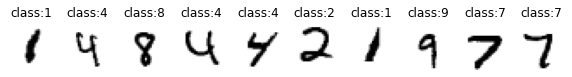

In [ ]:
#Mnist 이용하여 Multi Layer Perception(MLP) 설계하기
#MLP 설계 순서
#모듈 임포트 
#장비(cuda)
#mnist 다운로드 
#데이터 확인 
#모델 설계 
#optimizer 설정 
#함수 정의 

#1 모듈 임포트 
import numpy as np
import matplotlib.pyplot as plt #함수 실행결과 산출물에 대한 수치를 시각화 해주는 함수
import torch
import torch.nn as nn #신경망 함수 집합 
import torch.nn.functional as F  #위의 신경망 함수 중에서도 자주 사용하는것을 F로 지정 
from torchvision import transforms, datasets #비전 연구에 이용하는것 

#장비 확인 
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('DEVICE : ', DEVICE)

BATCH_SIZE = 32 #모델 학습에 필요한 데이터 개수의 단위 
EPOCHS = 10

#MNIST 데이터 다운 로드(TRAIN SET, TEST SET 으로 분리)
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = False,
                               transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, #다운로드 한 데이터 셋을 미니배치 단위로 분리해서 저장
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = False)
#데이터 확인
for (X_train, Y_train) in train_loader:
    print('X_train_size :',X_train.size(),'type :',X_train.type())
    print('Y_train_size :',Y_train.size(),'type :',Y_train.type())
    break

#X_train_size : torch.Size([32, 1, 28, 28]) type : torch.FloatTensor 32개의 이미지 데이터가 1개의 미니 배치를 구성 하고 있고 가로 28개 새로 28개의 픽셀 - > 흑백 
#Y_train_size : torch.Size([32]) type : torch.LongTensor
#데이터 확인
pltsize = 1 
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28),cmap = "gray_r")

    plt.title('class:'+str(Y_train[i].item()))

In [ ]:
#모델 설계 하기
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(28*28 , 512)
        self.fc2 = nn.Linear(512 , 256)
        self.fc3 = nn.Linear(256 , 10)
    def faward(self,x):
        x = x.view(-1,28,28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

#Optimizer, Objective Function 설정하기
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()
print(model)


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)
